     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 

C:\Users\BCA 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BCA 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BCA 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BCA 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

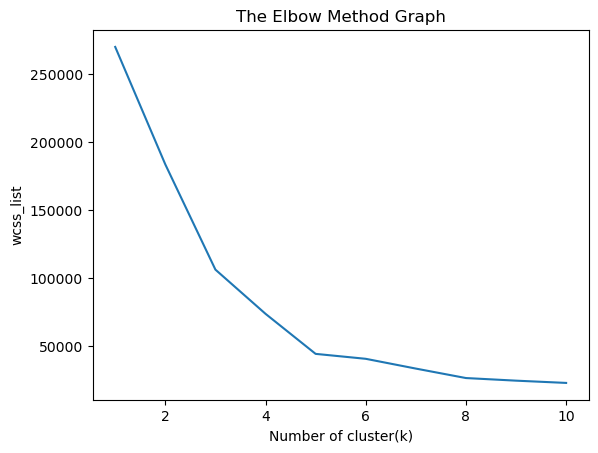

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


C:\Users\BCA 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


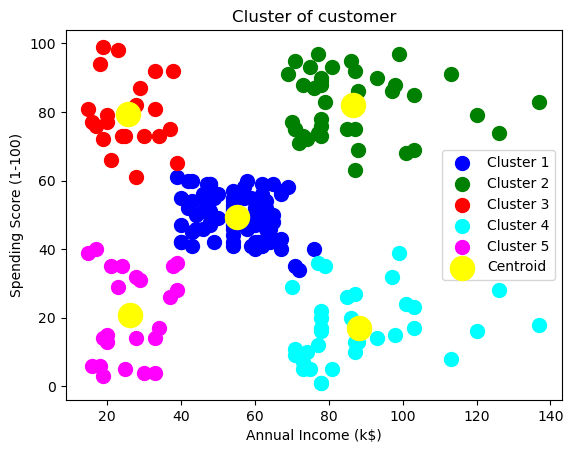

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [26]:

import os
os.environ["OMP_NUM_THREADS"] = "1"

# clustering



import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp

dataset=pd.read_csv('C:\\Users\\BCA 11\\Documents\\Mall_Customers.csv')
print(dataset)
x=dataset.iloc[:,[3,4]].values
print(x)

from sklearn.cluster import KMeans
wcss_list=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1,11),wcss_list)
mtp.title("The Elbow Method Graph")
mtp.xlabel("Number of cluster(k)")
mtp.ylabel("wcss_list")
mtp.show()

# training the k-means algorithm on the training dataset

kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_predict=kmeans.fit_predict(x)
print(y_predict)

#visualizing the cluster

mtp.scatter(x[y_predict==0,0],x[y_predict==0,1],s=100,c='blue',label='Cluster 1')
mtp.scatter(x[y_predict==1,0],x[y_predict==1,1],s=100,c='green',label='Cluster 2')
mtp.scatter(x[y_predict==2,0],x[y_predict==2,1],s=100,c='red',label='Cluster 3')
mtp.scatter(x[y_predict==3,0],x[y_predict==3,1],s=100,c='cyan',label='Cluster 4')
mtp.scatter(x[y_predict==4,0],x[y_predict==4,1],s=100,c='magenta',label='Cluster 5')
mtp.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroid')
mtp.title("Cluster of customer")
mtp.xlabel("Annual Income (k$)")
mtp.ylabel("Spending Score (1-100)")
mtp.legend()
mtp.show()
print(y_predict)     


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


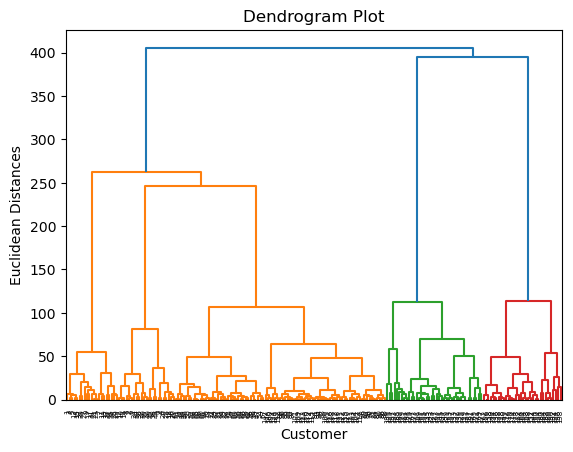

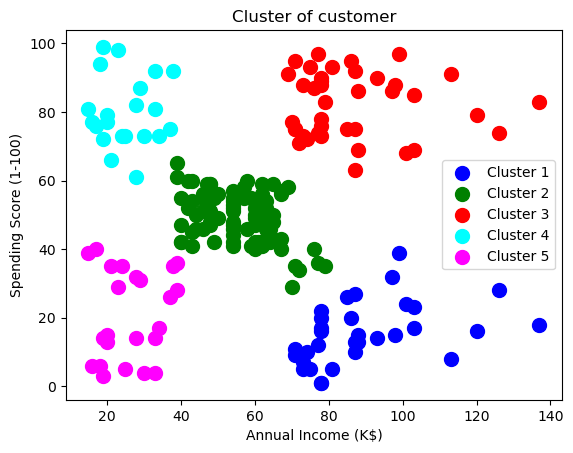

In [27]:
#Hierarchical clustering: 
#Working of Dendrogram in Hierarchical clustering 

import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp

dataset=pd.read_csv('C:\\Users\\BCA 11\\Documents\\Mall_Customers.csv')
print(dataset)
x=dataset.iloc[:,[3,4]].values

#Finding the optimal number of clusters using the Dendrogram
import scipy.cluster.hierarchy as shc
dendro=shc.dendrogram(shc.linkage(x,method="ward"))
mtp.title("Dendrogram Plot")
mtp.xlabel("Customer")
mtp.ylabel("Euclidean Distances")
mtp.show()

# training the hierarchical model on dataset

from sklearn.cluster import  AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=5,linkage='ward')
y_predict=hc.fit_predict(x)

#visualizing the cluster

mtp.scatter(x[y_predict==0,0],x[y_predict==0,1],s=100,c='blue',label='Cluster 1')
mtp.scatter(x[y_predict==1,0],x[y_predict==1,1],s=100,c='green',label='Cluster 2')
mtp.scatter(x[y_predict==2,0],x[y_predict==2,1],s=100,c='red',label='Cluster 3')
mtp.scatter(x[y_predict==3,0],x[y_predict==3,1],s=100,c='cyan',label='Cluster 4')
mtp.scatter(x[y_predict==4,0],x[y_predict==4,1],s=100,c='magenta',label='Cluster 5')
mtp.title('Cluster of customer')
mtp.xlabel('Annual Income (K$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()
           

C:\Users\BCA 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


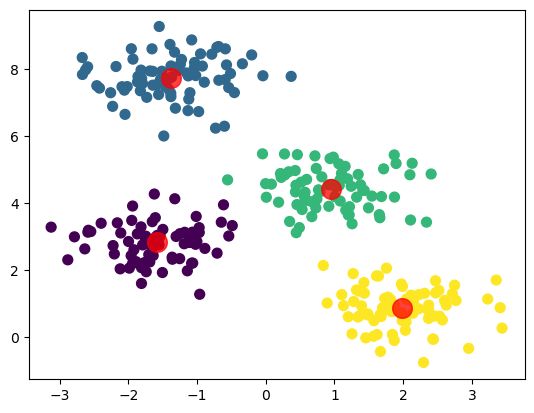

In [28]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# assignment 

#set b
#1



import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

x,_=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)
kmeans=KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans=kmeans.predict(x)
plt.scatter(x[:,0],x[:,1],c=y_kmeans,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.75)
plt.show()

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

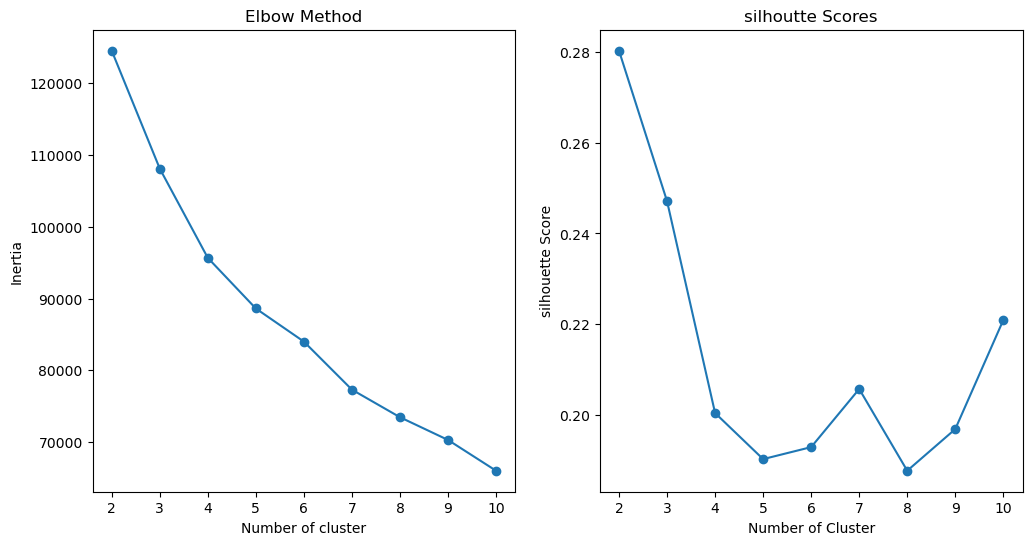

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [29]:
#set a
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
data=pd.read_csv('C:\\Users\\BCA 11\\Downloads\\CC GENERAL.csv')
print(data)
data_cleaned=data.drop(['CUST_ID'],axis=1).dropna()
print('cleaned data :\n')
print(data_cleaned)
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data_cleaned)
inertia=[]
silhouette_scores=[]
k_value=range(2,11)
for k in k_value:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled,kmeans.labels_))
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(k_value,inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.subplot(1,2,2)
plt.plot(k_value,silhouette_scores,marker='o')
plt.title('silhoutte Scores')
plt.xlabel('Number of Cluster')
plt.ylabel('silhouette Score')
plt.show()
optimal_k=5
kmeans_final=KMeans(n_clusters=optimal_k,random_state=42)
kmeans_final.fit(data_scaled)
data_cleaned['Cluster']=kmeans_final.labels_
print(data_cleaned.head())
           





     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0             1   19                  15                      39
1             2   21                  15                      81
2             3   20                  16                       6
3             4   23                  16                      77
4             5   31                  17                      40
..          ...  ...                 ...                     ...
195         196   35                 120                      79
196         197   45                 126                      28
197         198   32                 126                      74
198         199   32                 137                      18
199         200   30                 137                      83

[200 rows x 4 columns]


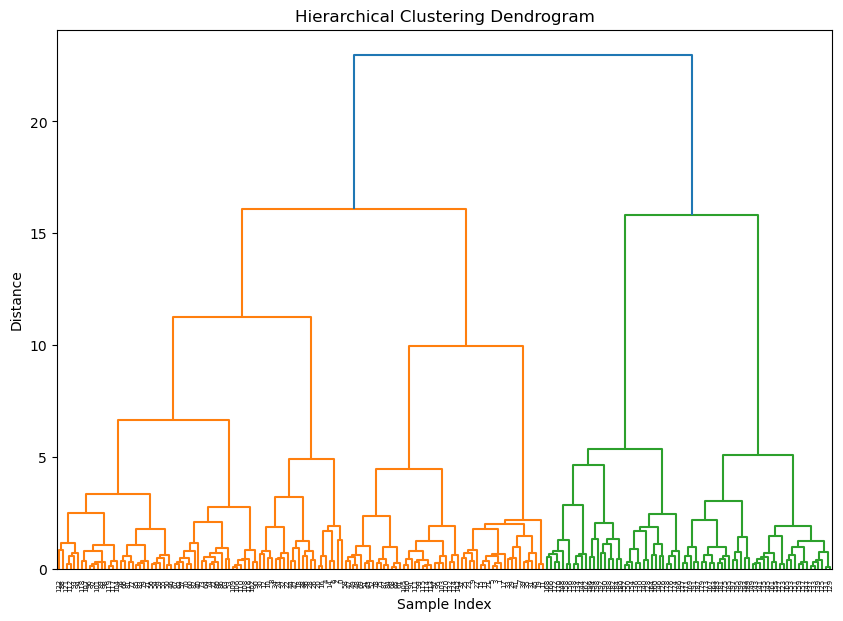

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0           1   19                  15                      39        1
1           2   21                  15                      81        2
2           3   20                  16                       6        1
3           4   23                  16                      77        2
4           5   31                  17                      40        1


In [30]:
#set a
#2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram,linkage

data=pd.read_csv('C:\\Users\\BCA 11\\Documents\\Mall_Customers.csv')
data=data.select_dtypes(include=[np.number])
print(data)
data_scaled=StandardScaler().fit_transform(data)
linked=linkage(data_scaled,method='ward')
plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
model=AgglomerativeClustering(n_clusters=3)
clusters=model.fit_predict(data_scaled)
data['cluster']=clusters
print(data.head())



In [31]:
#set b
#2

